# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aulia Aisyah Putri
- **Email:** auliaaisyahp@gmail.com / m204b4kx0722@bangkit.academy
- **ID Dicoding:** auliaa16

## Menentukan Pertanyaan Bisnis

- Apakah ada tren peningkatan penggunaan sepeda pada musim tertentu dalam setahun?
- Jam berapa penggunaan sepeda paling tinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install streamlit
import streamlit as st

ModuleNotFoundError: No module named 'matplotlib'

## Data Wrangling

### Gathering Data

In [41]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

#Data Day
print("Day Dataset:")
print(day_df.head(), "\n")

print("Informasi Day Dataset:")
print(day_df.info(), "\n")

#Data Hours
print("Hour Dataset:")
print(hour_df.head(), "\n")

print("Informasi Hour Dataset:")
print(hour_df.info(), "\n")



Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Informasi D

**Insight:**
- Dataset  day.csv (731 entri, 16 kolom) yang mewakili data penggunaan sepeda secara harian selama dua tahun (2011-2012), memiliki kolom penting: cnt (total pengguna sepeda), temp, hum, windspeed, dan weathersit, dan kolom dteday bisa dikonversi ke datetime. Day Dataset bisa digunakan untuk analisis tren harian, seperti melihat tren penggunaan sepeda per bulan, atau melihat bagaimana hari kerja dan akhir pekan memengaruhi penggunaan sepeda.

- Dataset hour.csv (17.379 entri, 17 kolom) yang merepresentasikan data penggunaan sepeda per jam selama 2011-2012, memiliki kolom penting: hr (jam), cnt (total pengguna per jam), temp, weathersit. Hour Dataset memberikan granularitas lebih tinggi untuk analisis pola penggunaan sepeda sepanjang hari, yang memungkinkan kita mengidentifikasi waktu-waktu puncak atau pengaruh cuaca pada jam-jam tertentu.

### Assessing Data

In [42]:
# Missing Values
print("Missing values in Day dataset:\n", day_df.isnull().sum())
print("\nMissing values in Hour dataset:\n", hour_df.isnull().sum())

# Duplicate Data
print("\nDuplicate entries in Day dataset:", day_df.duplicated().sum())
print("Duplicate entries in Hour dataset:", hour_df.duplicated().sum())

# 3. Melihat statistik deskriptif
print("\nDescriptive statistics for Day dataset:")
print(day_df.describe())
print("\nDescriptive statistics for Hour dataset:")
print(hour_df.describe())

# Invalid Values (negative values di kolom yang seharusnya positif)
invalid_day = day_df[(day_df['temp'] < 0) | (day_df['hum'] < 0) | (day_df['windspeed'] < 0)]
invalid_hour = hour_df[(hour_df['temp'] < 0) | (hour_df['hum'] < 0) | (hour_df['windspeed'] < 0)]
print("\nInvalid values in Day dataset:\n", invalid_day)
print("\nInvalid values in Hour dataset:\n", invalid_hour)

# Inaccurate Values (jika suhu tidak mungkin lebih dari 1 (karena dinyatakan dalam rentang 0-1))
inaccurate_day = day_df[day_df['temp'] > 1]
inaccurate_hour = hour_df[hour_df['temp'] > 1]
print("\nInaccurate values in Day dataset:\n", inaccurate_day)
print("\nInaccurate values in Hour dataset:\n", inaccurate_hour)

# Inconsistent Values (cek konsistensi data tahun (hanya 2011 dan 2012 yang valid))
inconsistent_day = day_df[day_df['yr'] < 0]
inconsistent_hour = hour_df[hour_df['yr'] < 0]
print("\nInconsistent values in Day dataset:\n", inconsistent_day)
print("\nInconsistent values in Hour dataset:\n", inconsistent_hour)


# Outlier menggunakan IQR (Interquartile Range) untuk kolom 'cnt' (count)
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day
outliers_day = day_df[(day_df['cnt'] < (Q1_day - 1.5 * IQR_day)) | (day_df['cnt'] > (Q3_day + 1.5 * IQR_day))]

Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour
outliers_hour = hour_df[(hour_df['cnt'] < (Q1_hour - 1.5 * IQR_hour)) | (hour_df['cnt'] > (Q3_hour + 1.5 * IQR_hour))]

print("\nOutliers in Day dataset:\n", outliers_day)
print("\nOutliers in Hour dataset:\n", outliers_hour)


Missing values in Day dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in Hour dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate entries in Day dataset: 0
Duplicate entries in Hour dataset: 0

Descriptive statistics for Day dataset:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1

**Insight:**
- Tidak ada nilai yang hilang (missing values) di kedua dataset (Day dan Hour). Hal ini menunjukkan bahwa data lengkap dan siap untuk analisis lebih lanjut
- Tidak ditemukan entri duplikat di kedua dataset. Data yang bersih dari duplikat membantu menjaga keakuratan analisis dan model yang akan dikembangkan.
- Tidak ditemukan nilai yang tidak valid. Ini berarti semua nilai dalam kolom yang dianalisis berada dalam rentang yang diharapkan, yang mendukung validitas data
-Tidak ada nilai yang tidak akurat terdeteksi. Ini menunjukkan bahwa data tersebut tampaknya telah dikumpulkan atau dicatat dengan benar sesuai dengan standar yang diharapkan
-Tidak ada nilai yang tidak konsisten ditemukan. Semua data tampaknya memenuhi kriteria yang ditetapkan untuk tahun dan kolom lainnya, yang mendukung konsistensi data
-Ada 505 outlier yang terdeteksi di dataset Hour berdasarkan kolom cnt (jumlah pengguna). Outlier ini perlu dianalisis lebih lanjut karena dapat mempengaruhi analisis yang akan dilakukan, terutama jika Anda menggunakan metode statistik yang sensitif terhadap outlier

### Cleaning Data

In [43]:
# Fungsi untuk mendeteksi dan menghapus outliers menggunakan metode IQR
def remove_outliers(df, column):
    # Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range (IQR)

    # Mendefinisikan batasan outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyaring baris yang mengandung outlier
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Menerapkan fungsi untuk menghapus outliers pada kolom 'cnt' di dataset Hour
hour_cleaned = remove_outliers(hour_df, 'cnt')

# Menampilkan jumlah baris yang dihapus
print(f'Jumlah baris yang dihapus: {len(hour_df) - len(hour_cleaned)}')

# Menyimpan dataset yang sudah dibersihkan
hour_cleaned.to_csv('hour_cleaned.csv', index=False)

# Untuk dataset Day, tidak ada pembersihan yang dibutuhkan berdasarkan hasil assesing
# Menyimpan dataset Day tanpa perubahan
day_df.to_csv('day_cleaned.csv', index=False)


Jumlah baris yang dihapus: 505


**Insight:**
- Proses pembersihan data menunjukkan bahwa sebanyak 505 baris dihapus dari dataset Hour karena teridentifikasi sebagai outlier. Proses ini menunjukkan adanya sejumlah besar data yang berbeda secara signifikan dari tren umum dan dapat mempengaruhi analisis jika tidak dihapus.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#pairplot for numeric variables
sns.pairplot(day_df,vars = ['cnt',"temp",'atemp', "hum",'windspeed','registered','casual'])
plt.show()

**Insight**

Dari penggambaran diatas dapat disimpulkan jika:
*   Jumlah total sepeda berkorelasi dengan Suhu
*   Jumlah total tidak dipengaruhi oleh Kecepatan Angin, Kelembaban


In [ ]:
season_avg_hour = hour_df.groupby('season')['cnt'].mean()
season_avg_day = day_df.groupby('season')['cnt'].mean()

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi pengaruh musim (Per Jam) di subplot kiri
season_avg_hour.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Rata-rata Peminjaman Sepeda Berdasarkan Musim (Per Jam)')
axes[0].set_xlabel('Musim')
axes[0].set_ylabel('Rata-rata Jumlah Peminjam')

# Visualisasi pengaruh musim (Per Hari) di subplot kanan
season_avg_day.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Rata-rata Peminjaman Sepeda Berdasarkan Musim (Per Hari)')
axes[1].set_xlabel('Musim')
axes[1].set_ylabel('Rata-rata Jumlah Peminjam')

plt.tight_layout()
plt.show()

**Insight**
- Jumlah peminjam sepeda secara signifikan dipengaruhi oleh musim. Pada musim panas (season 2) dan musim gugur (season 3), jumlah peminjam sepeda meningkat, yang menunjukkan bahwa cuaca yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, pada musim dingin (season 1), peminjaman sepeda cenderung menurun

In [ ]:
plt.figure(figsize=(18, 5))

# Hubungan antara cuaca dan peminjaman (Suhu)
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjam Sepeda')

# Hubungan antara kelembaban dan peminjaman
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjam Sepeda')

# Hubungan antara kecepatan angin dan peminjaman
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Peminjam Sepeda')

plt.tight_layout()
plt.show()


**Insight**

- Terdapat korelasi positif antara suhu (temp) dan jumlah peminjam sepeda, yang berarti semakin hangat suhu, semakin banyak orang yang menggunakan sepeda.
Kelembaban: Ada korelasi negatif antara kelembaban (hum) dan peminjaman sepeda. Saat kelembaban meningkat, jumlah peminjam sepeda menurun, mungkin karena tingkat kenyamanan yang lebih rendah.
Kecepatan Angin: Kecepatan angin juga mempengaruhi jumlah peminjam sepeda. Pada kecepatan angin yang lebih tinggi, jumlah peminjam cenderung berkurang, mungkin karena bersepeda menjadi lebih sulit di kondisi angin yang kencang.

In [ ]:
# Rata-rata peminjaman berdasarkan hari libur (Per Jam)
holiday_avg_hour = hour_df.groupby('holiday')['cnt'].mean()

# Rata-rata peminjaman berdasarkan hari kerja (Per Jam)
workingday_avg_hour = hour_df.groupby('workingday')['cnt'].mean()

# Mengatur ukuran figure untuk subplot
plt.figure(figsize=(12, 5))

# Plot rata-rata peminjaman berdasarkan hari libur
plt.subplot(1, 2, 1)
holiday_avg_hour.plot(kind='bar', color='coral')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari Libur (Per Jam)')
plt.xlabel('Libur (0 = Bukan Libur, 1 = Libur)')
plt.ylabel('Rata-rata Jumlah Peminjam')

# Plot rata-rata peminjaman berdasarkan hari kerja
plt.subplot(1, 2, 2)
workingday_avg_hour.plot(kind='bar', color='lightblue')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari Kerja (Per Jam)')
plt.xlabel('Hari Kerja (0 = Bukan Hari Kerja, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Peminjam')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Rata-rata peminjaman per jam
hour_avg = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10,6))
hour_avg.plot(kind='line', marker='o', color='purple')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.grid(True)
plt.show()

In [ ]:
# Membandingkan pengguna kasual dan terdaftar
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual', color='red')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered', color='blue')
plt.title('Perbandingan Pengguna Kasual dan Terdaftar Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjam')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Tren peminjaman sepeda berdasarkan tahun
year_avg_day = day_df.groupby('yr')['cnt'].mean()

plt.figure(figsize=(8,6))
year_avg_day.plot(kind='bar', color='green')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun (0 = 2011, 1 = 2012)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.show()

In [ ]:
corr_matrix = hour_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Bike Sharing Data', fontsize=16)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah ada tren peningkatan penggunaan sepeda pada musim tertentu dalam setahun?

<ipython-input-55-de9fb552b6d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_cleaned['season_label'] = hour_cleaned['season'].map(season_labels)
<ipython-input-55-de9fb552b6d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='cnt', data=season_usage, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

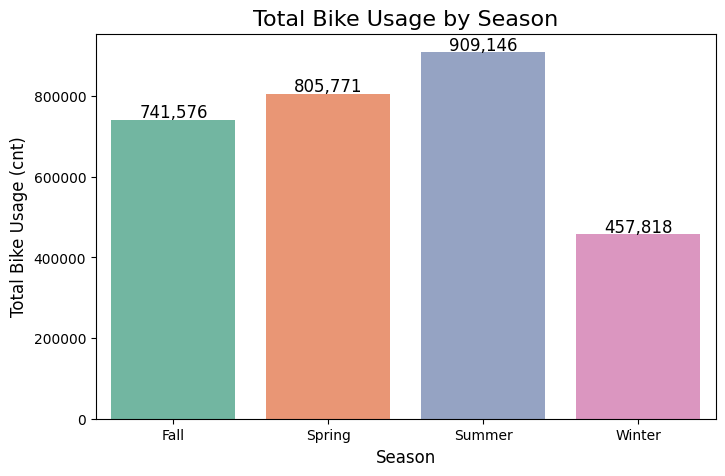

In [55]:
# Ubah Data
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_cleaned['season_label'] = hour_cleaned['season'].map(season_labels)


season_usage = hour_cleaned.groupby('season_label')['cnt'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='season_label', y='cnt', data=season_usage, palette='Set2')

plt.title('Total Bike Usage by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Usage (cnt)', fontsize=12)

for index, value in enumerate(season_usage['cnt']):
    plt.text(index, value + 5000, f'{value:,.0f}', ha='center', fontsize=12)

plt.show()

### Pertanyaan 2:

Jam berapa penggunaan sepeda paling tinggi dalam sehari?

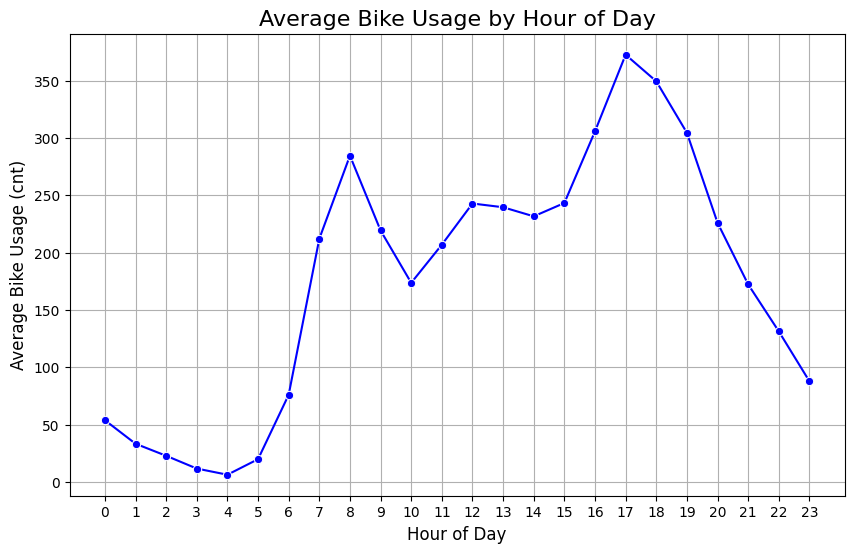

In [56]:
hourly_usage = hour_cleaned.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi penggunaan sepeda berdasarkan waktu (jam)
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_usage, marker='o', color='b')
plt.title('Average Bike Usage by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Bike Usage (cnt)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Dari visualisasi pertanyaan 1, kita dapat melihat tren peningkatan penggunaan sepeda berdasarkan musim. Jika penggunaan sepeda lebih tinggi di musim panas dan musim gugur hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, penggunaan sepeda mungkin lebih rendah di musim dingin, karena cuaca dingin bisa menjadi penghalang

- Visualisasi untuk pertanyaan 2 menunjukkan pola penggunaan sepeda berdasarkan waktu. Terdapat dua puncak besar:
Pagi hari (sekitar jam 8), yang menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja.
Sore hari (sekitar jam 17-18), saat orang pulang kerja.
Hal ini menunjukkan bahwa penggunaan sepeda paling tinggi terjadi selama jam sibuk pagi dan sore hari, yang menandakan sepeda digunakan sebagai moda transportasi untuk bekerja

## Analisis Lanjutan (Opsional)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='casual', data=hour_cleaned, label='Casual Users', color='blue')
sns.lineplot(x='hr', y='registered', data=hour_cleaned, label='Registered Users', color='green')
plt.title('Bike Usage by Hour of Day: Casual vs Registered Users', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Bike Usage', fontsize=12)
plt.legend()
plt.show()


## Conclusion

- Penggunaan sepeda cenderung meningkat selama musim panas dan musim gugur, sementara menurun di musim dingin
- Penggunaan sepeda tertinggi terjadi pada jam-jam sibuk dimulai dari jam 8 pagi sampai jam 18.00 sore hari yang mana jam 17.00 merupakan titik puncak, kemungkinan karena banyak pengguna yang menggunakan sepeda untuk bekerja

In [60]:
with open('dashboard.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('hour.csv')

# Title
st.title("Bike Sharing Data Analysis")

# Pilihan visualisasi
visual_choice = st.sidebar.selectbox("Pilih Visualisasi", ["Pengaruh Suhu terhadap Penyewaan", "Jumlah Penyewaan per Jam"])

# Visualisasi 1: Pengaruh Suhu terhadap Jumlah Penyewaan
if visual_choice == "Pengaruh Suhu terhadap Penyewaan":
    st.header("Pengaruh Suhu terhadap Jumlah Penyewaan")
    fig, ax = plt.subplots()
    sns.scatterplot(x='temp', y='cnt', data=data, ax=ax)
    st.pyplot(fig)

# Visualisasi 2: Jumlah Penyewaan per Jam
if visual_choice == "Jumlah Penyewaan per Jam":
    st.header("Jumlah Penyewaan per Jam")
    fig, ax = plt.subplots()
    sns.barplot(x='hr', y='cnt', data=data, ax=ax)
    st.pyplot(fig)
    """)


In [61]:
from google.colab import files
files.download('dashboard.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>